In [ ]:
from tensorflow.keras.datasets import mnist #Загружаем базу mnist
from tensorflow.keras.datasets import cifar10 #Загружаем базу cifar10
from tensorflow.keras.datasets import cifar100 #Загружаем базу cifar100

from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
# подключем диск
from google.colab import drive

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Распознавание изображений из набора данных Cifar10

*Разбор данного раздела:* https://youtu.be/c78nXd8NuK4?t=964

In [ ]:
#Загружаем cifar10
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train10.shape

(50000, 32, 32, 3)

In [ ]:
#Определяем названия классов по порядку
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

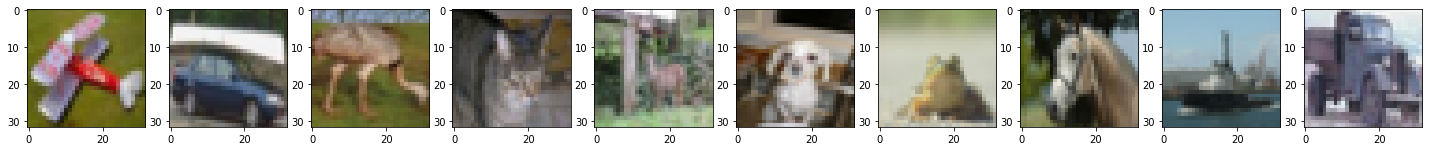

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) #Создаем полотно из 10 графиков
for i in range(10): #Проходим по классам от 0 до 9
  label_indexes = np.where(y_train10==i)[0] #Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) #Случайным образом выбираем из списка индекс
  img = x_train10[index] #Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img)) #Отображаем изображение i-ым графиков

plt.show() #Показываем изображения

In [ ]:
#Превращаем y_train и y_test сетей в формат one hot encoding
y_train10 = utils.to_categorical(y_train10, 10)
y_test10 = utils.to_categorical(y_test10, 10)

In [ ]:
# Посмотрим размеры выборок перед обучением
print(x_train10.shape)
print(x_test10.shape)
print(y_train10.shape)
print(y_test10.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


**Нейронная сеть**

*Разбор данного раздела:* https://youtu.be/c78nXd8NuK4?t=1093

Epoch 1/20
391/391 [==============================] - 15s 36ms/step - loss: 1.4038 - accuracy: 0.4907 - val_loss: 1.7058 - val_accuracy: 0.4690
Epoch 2/20
391/391 [==============================] - 13s 34ms/step - loss: 0.9334 - accuracy: 0.6693 - val_loss: 0.8406 - val_accuracy: 0.7130
Epoch 3/20
391/391 [==============================] - 13s 34ms/step - loss: 0.7407 - accuracy: 0.7392 - val_loss: 0.7566 - val_accuracy: 0.7395
Epoch 4/20
391/391 [==============================] - 13s 34ms/step - loss: 0.6300 - accuracy: 0.7788 - val_loss: 0.7000 - val_accuracy: 0.7643
Epoch 5/20
391/391 [==============================] - 13s 34ms/step - loss: 0.5476 - accuracy: 0.8066 - val_loss: 0.7074 - val_accuracy: 0.7684
Epoch 6/20
391/391 [==============================] - 14s 35ms/step - loss: 0.4854 - accuracy: 0.8297 - val_loss: 0.7705 - val_accuracy: 0.7574
Epoch 7/20
391/391 [==============================] - 13s 34ms/step - loss: 0.4295 - accuracy: 0.8483 - val_loss: 0.7412 - val_accuracy:

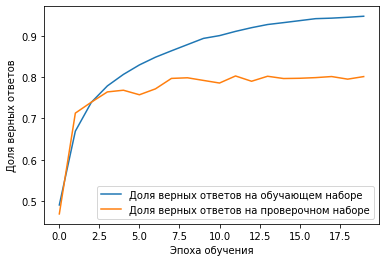

In [ ]:
#задаём batch_size
batch_size = 128 

#Создаем последовательную модель
model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
#Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
#model.add(Dropout(0.25))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Пятый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Шестой сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Третий слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
#model.add(Dropout(0.25))

#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=20,
                    validation_data=(x_test10, y_test10),
                    verbose=1)

#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

1. Влияние слоев (не гиперпараметров а слоев) проверял отключая 2,4 и 6 слои по одному, по два и три разом. Диапазон точности на тестовой выборке сильно не менялся и находился в коридоре от 80,53% (минус 2 и 4 слои) до 81,78% (минус 2 и 6 слои). Однако самый высокий показатель, вышедший и коридора был 83,17% при отключении 6 слоя. Время обучения также сильно не различалось и при отключении 1 или 2 слоев составляло порядка 3 мин и 25 - 57 сек. При отключении трех слоев время обучения сократилось до 2 мин. 23 сек (80,72%). 
Вывод на качество работы нейронной сети больше влияет не количество слоев, а правильный подбор архитектуры и настройка гиперпараметров. В ряде случаев, если точность допустимая, снижение количества слоев может ускорить работу сети, что влияет на ресурные затраты.
2. При замене в первом скрытом слое количества нейронов получились следующие показатели точности на тестовой выборке:
2 нерона = 80,66 %
4 нейрона = 81,73 %
16 неронов = 82,38 %
При возврате к 32 нейронам = 81,83 %
Вывод: недостаток нейронов немного снижает точность модели хоть и не является критичным. Сеть требует тестирования для подбора наиболее оптимального значения, но не нужно забывать про погрешность и стандартное отклонение. Лучше проверку  делать неоднократно, во избежание выброса принятого за истину.
3. При отключении слоев MaxPooling2D выявил такую тенденцию: чем более ранний слой отключается, тем сильнее это сказывается на точности.
1 слой - 76,47%
2 слой - 79,82%
3 слой - 81,49%
1 и 2 слои - 10%
2 и 3 слои - 78,42%
Одновременное отключение 1 и 2 слоев оказалось критичным и сделало сеть практически неработоспособной для получения результата. При этом время обучения повысилось до 17 минут против 6-8 мин во всех остальных вариантах. Следовательно переизбыток значений векторов не уменьшенных MaxPooling слоем не позволяет эффективно реализовать возможности архитектуры сети и вычислительные мощности.
При изменении pool_size до 3,3 появились признаки переобучения несмотря на наличие слоев BatchNormalization и Dropout а точность составила 80,57%
4. Отключение первого слоя Dropout дало точность на выходе 83,23% - неплохо, но не забываем про стандартные отклонения. Отключение второго слоя результат - 80,14% Отключение третьего слоя - 82,44%. Повышение значения до 0,5 снизило точность до 81,23% (снова помним статистические отклонения). Отключение всех слоев Dropout - выход 81,23%. Признаков переобучения не наблюдается. Вывод в данной сети, по данным выборкам, работа слоев Dropout или их отключение не оказывает существенного влияния на точность, но при правильном подборе, все же позволяет выиграть пару процентов результативности.
